In [76]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [77]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [78]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

lin_reg = make_pipeline(StandardScaler(),
                        SimpleImputer(), 
                      LinearRegression())

lin_reg.fit(data_numerical, target)

target_predicted = lin_reg.predict(data_numerical)

mse = mean_squared_error(target, target_predicted)

mse

1633214557.9608486

In [80]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data_numerical, target, cv = 10, return_estimator = True)

for est in cv_results["estimator"]:
    print(est[-1].coef_.min(), est[-1].coef_.max())

-8089.136270187439 13756.818715544248
-8370.01203776386 13614.633730790032
-8072.783424733143 13570.200419305966
-7949.272395259781 14300.971205151924
-7762.287436309101 13029.940665491074
-7704.035884182391 13895.385494775013
-7562.131103288689 13686.293686833807
-8228.757799953024 13742.128138830594
-11974.43635478156 16601.821040824863
-7964.698621122203 13844.188491034201


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1108.040184,493.549062,6157.777559,-1.429518e+18,-5.021897e+17,-1.388930e+18,1.067428e+04,8.670649e+03,1.124683e+04,-2.772579e+03,...,2018.588492,11932.438264,-3278.454592,3347.349408,1488.198603,-3391.824436,109.931810,741.886836,-2419.027544,-1135.230446
max,3192.812984,2811.270402,7841.778092,8.814726e+03,3.606251e+02,3.630168e+03,1.375795e+18,1.561340e+17,1.738732e+17,1.983222e+16,...,3742.495077,22652.887617,4351.032903,5790.840525,3026.579436,-2101.491929,1697.203405,2173.661246,354.037187,617.743597


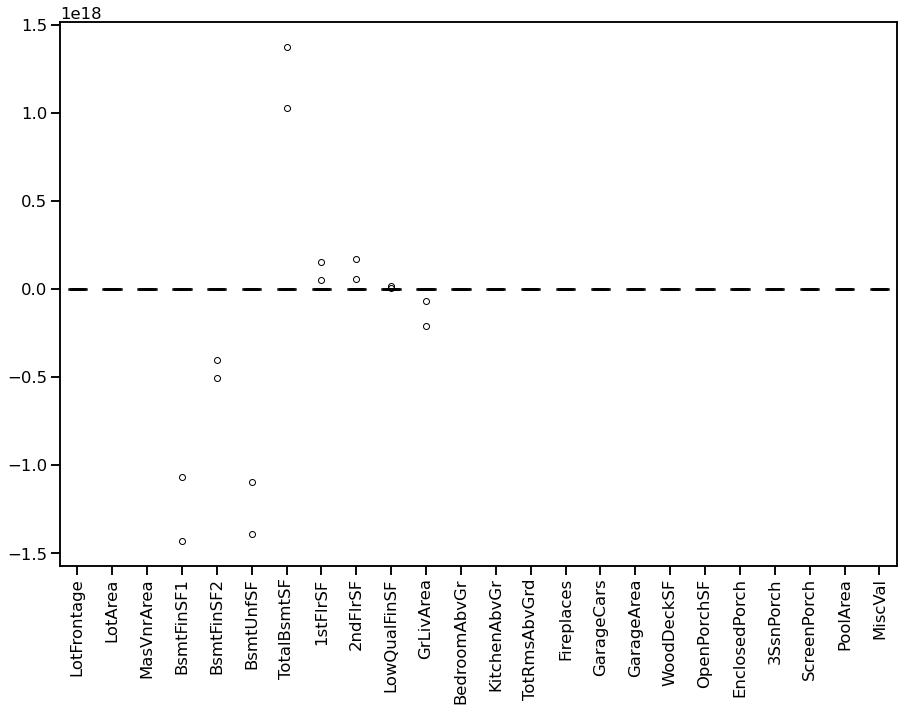

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [83]:
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1106.390251,493.241149,6160.174281,7862.675825,-658.138989,2228.279835,10672.328896,7710.158127,11239.294498,-2770.486291,...,2145.289789,11610.608799,-3181.355643,3289.713416,1494.094884,-3392.058947,32.71609,741.077136,-2417.383218,-1050.605437
max,3114.054017,2600.372186,7844.293345,11098.537210,358.864078,4174.361863,15692.315254,11243.761722,13643.834636,-1279.923974,...,3758.108015,22561.856453,4623.099297,5792.154742,3030.373856,-2103.032226,1697.55411,2172.625290,70.601154,608.205089


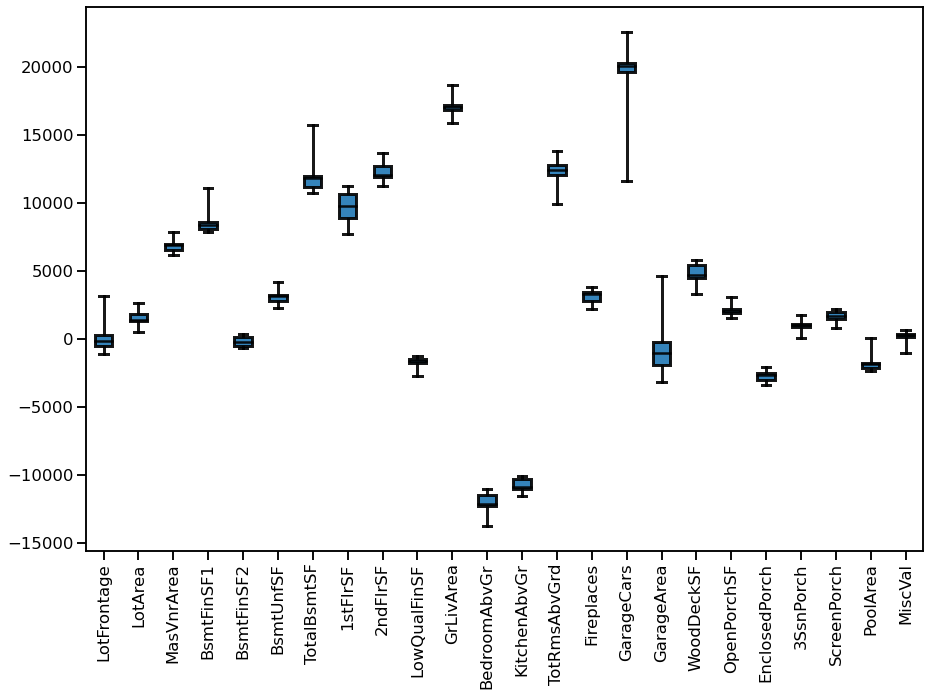

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

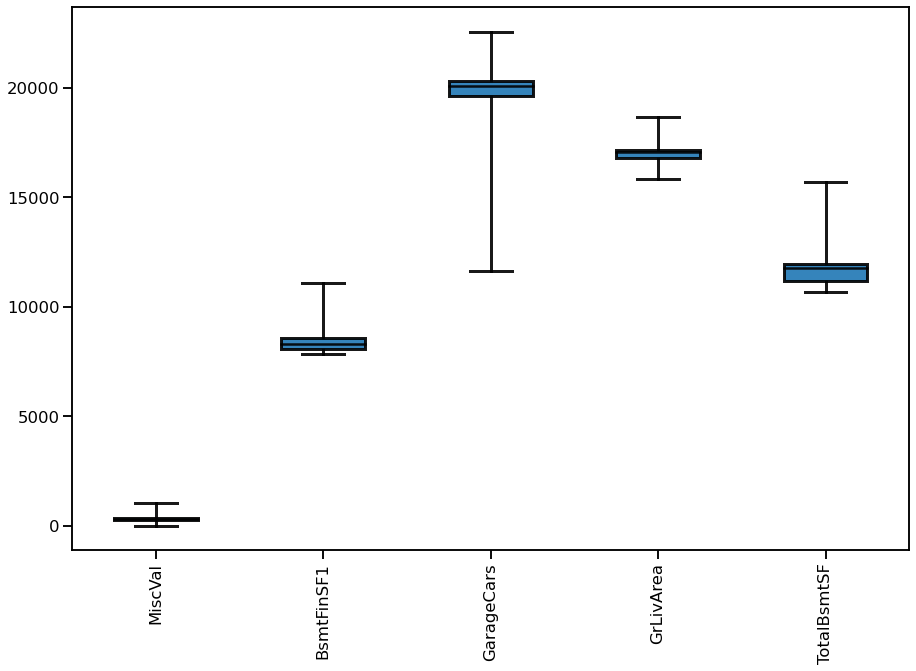

In [85]:
coefs_sel = coefs[["MiscVal", "BsmtFinSF1", "GarageCars", "GrLivArea", "TotalBsmtSF"]]
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs_sel.abs().plot.box(**boxplot_property, ax=ax)

In [86]:
data_numerical2 = data_numerical.drop(columns = "GarageArea")
'GarageArea' in data_numerical2.columns
numerical_features2 = numerical_features
numerical_features2.remove("GarageArea")

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

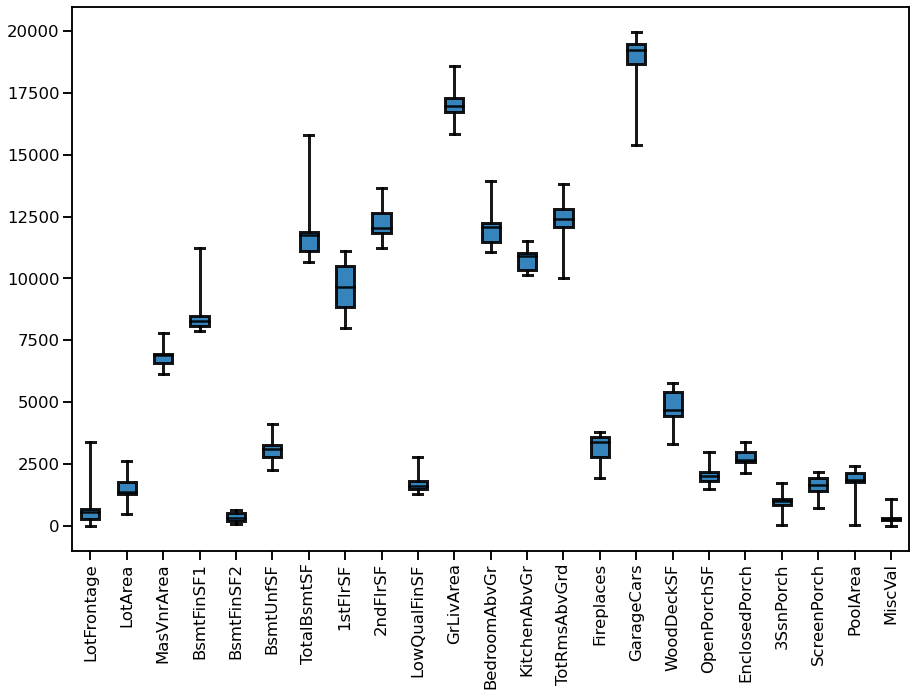

In [87]:
cv_results = cross_validate(
    model, data_numerical2, target, cv=10, return_estimator=True
)
coefs2 = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs2 = pd.DataFrame(coefs2, columns=numerical_features2)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs2.abs().plot.box(**boxplot_property, ax=ax)

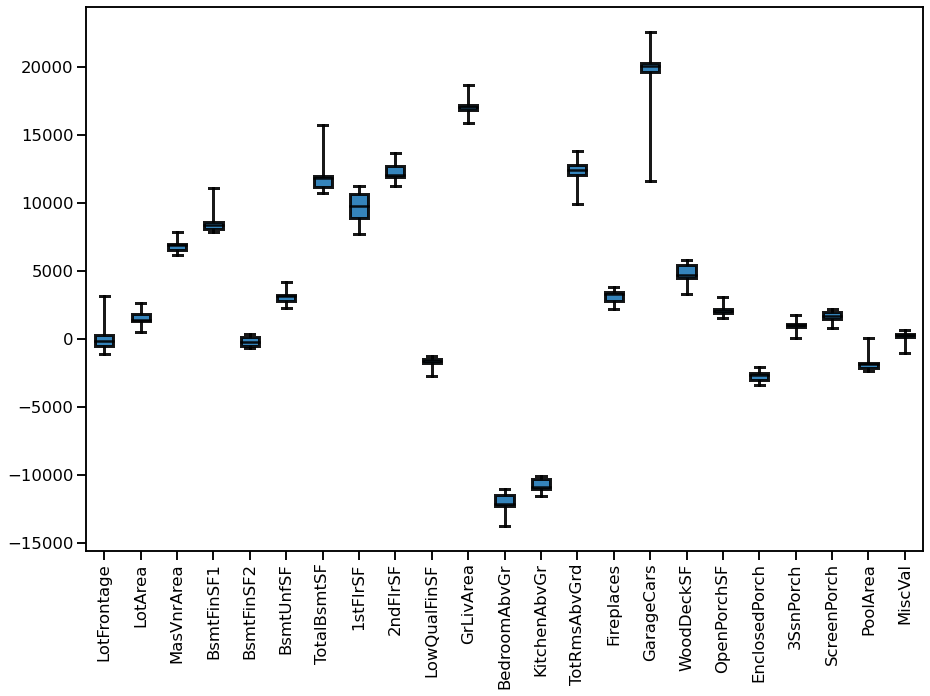

In [88]:
# Anciens coefficients sauf GarageArea
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.drop(columns="GarageArea").plot.box(**boxplot_property, ax=ax)

In [89]:
# Comparaison des deux séries de coefficients
coefs.describe().loc[["min", "max"]].append(coefs2.describe().loc[["min", "max"]])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1106.390251,493.241149,6160.174281,7862.675825,-658.138989,2228.279835,10672.328896,7710.158127,11239.294498,-2770.486291,...,2145.289789,11610.608799,-3181.355643,3289.713416,1494.094884,-3392.058947,32.716090,741.077136,-2417.383218,-1050.605437
max,3114.054017,2600.372186,7844.293345,11098.537210,358.864078,4174.361863,15692.315254,11243.761722,13643.834636,-1279.923974,...,3758.108015,22561.856453,4623.099297,5792.154742,3030.373856,-2103.032226,1697.554110,2172.625290,70.601154,608.205089
min,-1246.180254,472.202633,6144.828631,7866.531809,-657.940787,2270.422404,10653.999791,7994.882207,11235.642334,-2778.274269,...,1950.739227,15402.011069,NaN,3301.200824,1491.733758,-3403.607138,23.331581,742.723021,-2419.134257,-1074.090945
max,3374.129479,2616.065272,7806.524486,11242.631916,364.330676,4124.324453,15797.899648,11124.409669,13642.056831,-1282.701511,...,3803.220302,19964.350894,NaN,5785.565906,2978.113944,-2135.694244,1717.941854,2172.356300,56.766883,655.439772


In [90]:
# Solution
coefs.describe()["GarageCars"]

count       10.000000
mean     19417.890436
std       2895.195881
min      11610.608799
25%      19618.737124
50%      20080.291274
75%      20290.014228
max      22561.856453
Name: GarageCars, dtype: float64

In [91]:
column_to_drop = "GarageArea"
data_numerical = data_numerical.drop(columns=column_to_drop)

cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs.describe()["GarageCars"]

count       10.000000
mean     18837.583875
std       1305.925168
min      15402.011069
25%      18650.876471
50%      19223.880717
75%      19480.026815
max      19964.350894
Name: GarageCars, dtype: float64

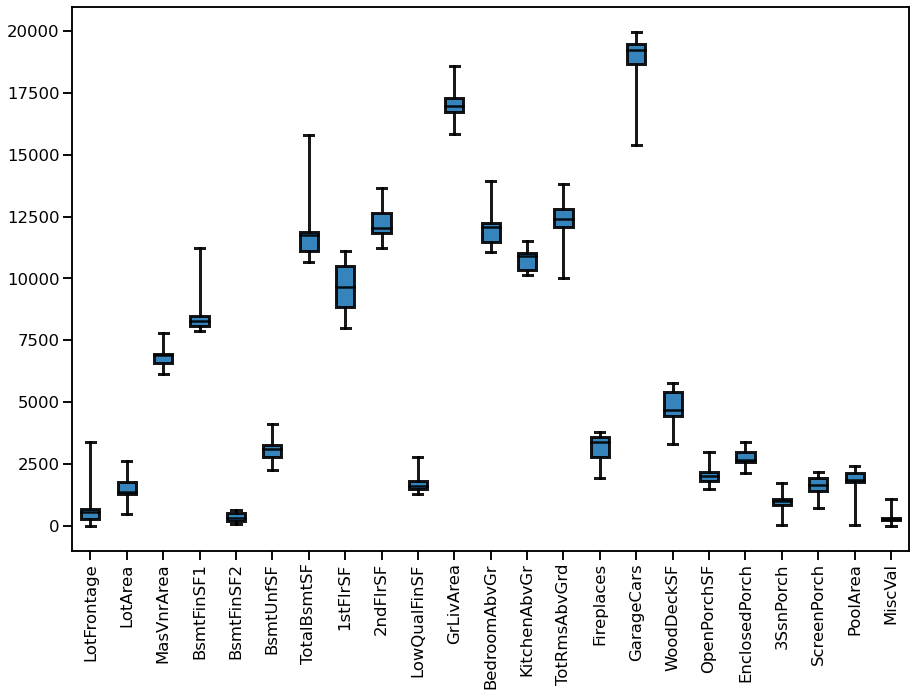

In [92]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

10
(1314, 30)
[[2.65619330e+07 2.65749964e+07 2.65929455e+07 ... 2.19725645e+08
  2.74864719e+08 3.36575443e+08]
 [3.27270412e+07 3.27353207e+07 3.27466943e+07 ... 9.21778245e+07
  9.70104479e+07 9.78754045e+07]
 [6.14334298e+08 6.14352461e+08 6.14377417e+08 ... 8.59783161e+08
  9.28778989e+08 1.00770885e+09]
 ...
 [2.72003243e+09 2.72004714e+09 2.72006735e+09 ... 2.90319131e+09
  2.96626169e+09 3.05183448e+09]
 [2.79690236e+08 2.79694605e+08 2.79700604e+08 ... 2.22722628e+08
  1.85861153e+08 1.39368482e+08]
 [5.21080619e+08 5.21129111e+08 5.21195726e+08 ... 9.64297376e+08
  1.04987600e+09 1.13119148e+09]]
0.1 1000.0
[True, True, True, True, True, True, True, True, True, True]


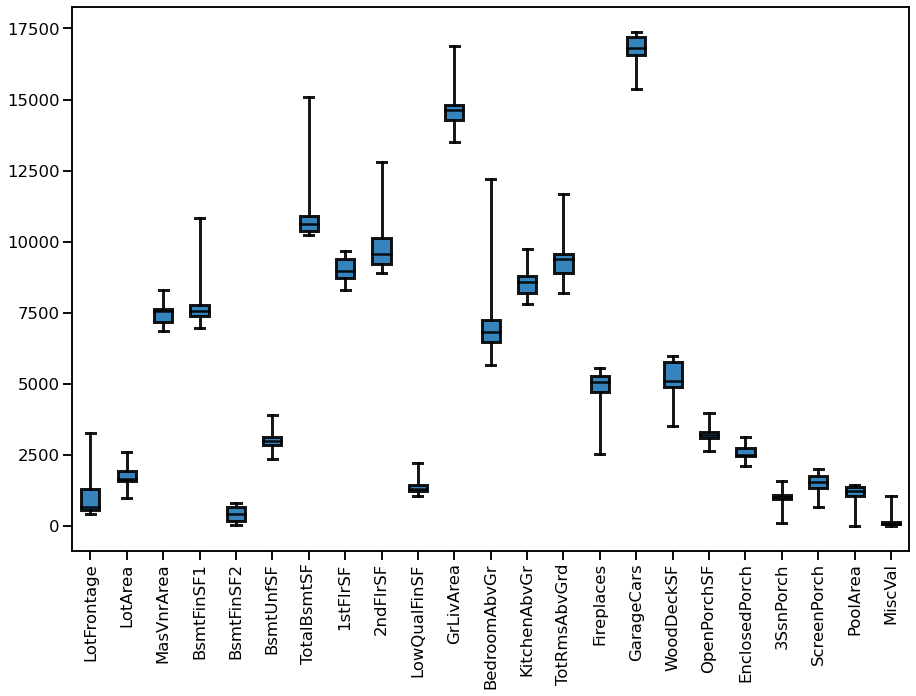

In [93]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas=np.logspace(-1, 3, num=30)

model = make_pipeline(StandardScaler(), SimpleImputer(), RidgeCV(alphas = alphas, store_cv_values=True))
cv_results = cross_validate(
    model, data_numerical2, target, cv=10, return_estimator=True
)

# Estimators
print(len(cv_results["estimator"])) # 10
cv_results["estimator"][0][-1].coef_
cv_results["estimator"][5][-1].alpha_
print(cv_results["estimator"][5][-1].cv_values_.shape)
print(cv_results["estimator"][5][-1].cv_values_)

# Alphas
alphas_cv = [est[-1].alpha_ for est in cv_results["estimator"]]
print(alphas.min(), alphas.max())
print([elt in alphas for elt in alphas_cv])

# Coefs
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
df = pd.DataFrame(coefs, columns = numerical_features2)
df.describe().loc[["min", "max", "mean", "std"]]

# Plot
_, ax = plt.subplots(figsize=(15, 10))
_ = df.abs().plot.box(**boxplot_property, ax=ax)

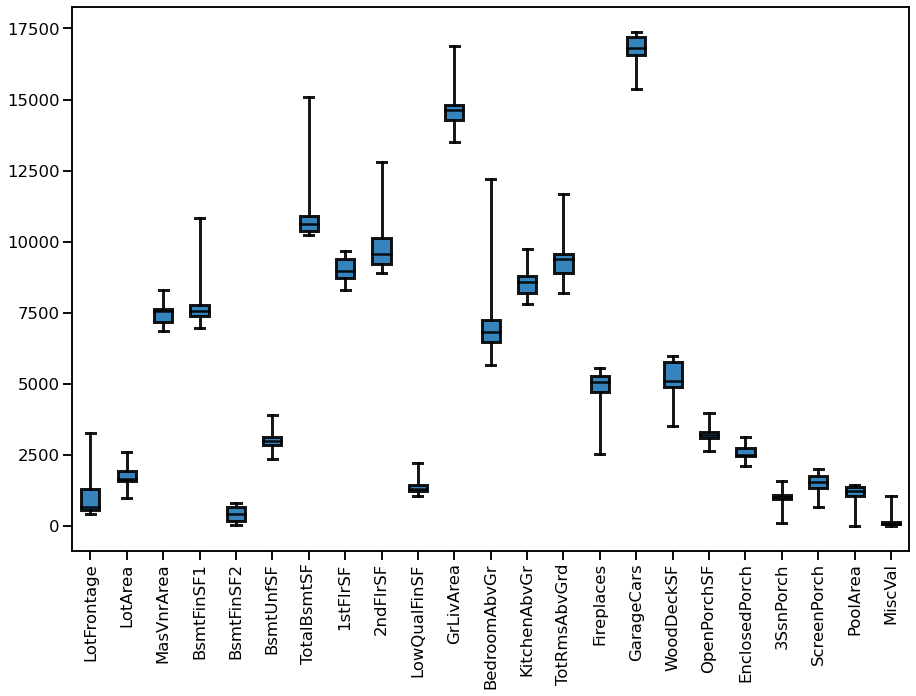

In [98]:
# Solution
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-1, 3, num=30)
model = make_pipeline(
    StandardScaler(), SimpleImputer(), RidgeCV(alphas=alphas)
)
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [103]:
# Exo
alphas_cv = pd.Series([est[-1].alpha_ for est in cv_results["estimator"]])

0    280.721620
1    385.662042
2    280.721620
3    280.721620
4    385.662042
5    385.662042
6    280.721620
7    280.721620
8     57.361525
9    385.662042
dtype: float64 300.36177955404634 57.361525104486816 385.6620421163472


<AxesSubplot:>

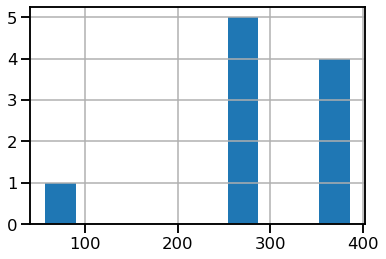

In [104]:
# Exo
print(alphas_cv, alphas_cv.mean(), alphas_cv.min(), alphas_cv.max())
pd.Series(alphas_cv).hist()

C:\Users\mathieu.rajerison\Miniconda3\envs\scikit-learn-course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


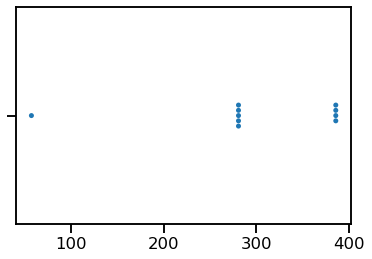

In [106]:
# Solution
ax = sns.swarmplot(alphas_cv)